# Modelo Naive Bayes para predicción de precipitaciones

## por: Luis Carlos Rincón y Jeison Polanco

### En el presente archivo se realizara la implementación del modelo de predicción Naive Bayes, el cual es un modelo clasificador probabilistico. Se basa en la probabilidad condicional y el teorema de bayes.

#### Empezamos importando las librerias para el entrenamiento, de las cuales la mas importante sera sklearn. Importando la función make_classification para tareas de clasificación.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from matplotlib import colors

%matplotlib inline
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

In [6]:
df_data = pd.read_csv('csv_Datos_prediccion_tesis_1.csv')
df_data.head()

,T,Po,Pa,U,Ff,N,Nh,VV,Td,tR,RRR
0,12.8,565.7,1.0,93,2,0.75,0.50,18.0,11.7,24,0
1,18.2,564.8,-0.5,57,7,0.60,0.60,18.0,9.5,6,0
2,12.0,565.9,-0.4,91,1,0.75,0.75,12.0,10.6,6,1
3,12.0,565.7,0.9,88,3,0.75,0.25,20.0,10.1,24,0
4,12.5,565.3,0.7,85,4,1.00,0.40,18.0,10.0,24,1


#### Visualización de la cantidad de datos por cada valor

In [7]:
print(df_data.groupby('RRR').size())

RRR
0    421
1    684
dtype: int64


#### Graficación de todas las variables a excepción de RRR

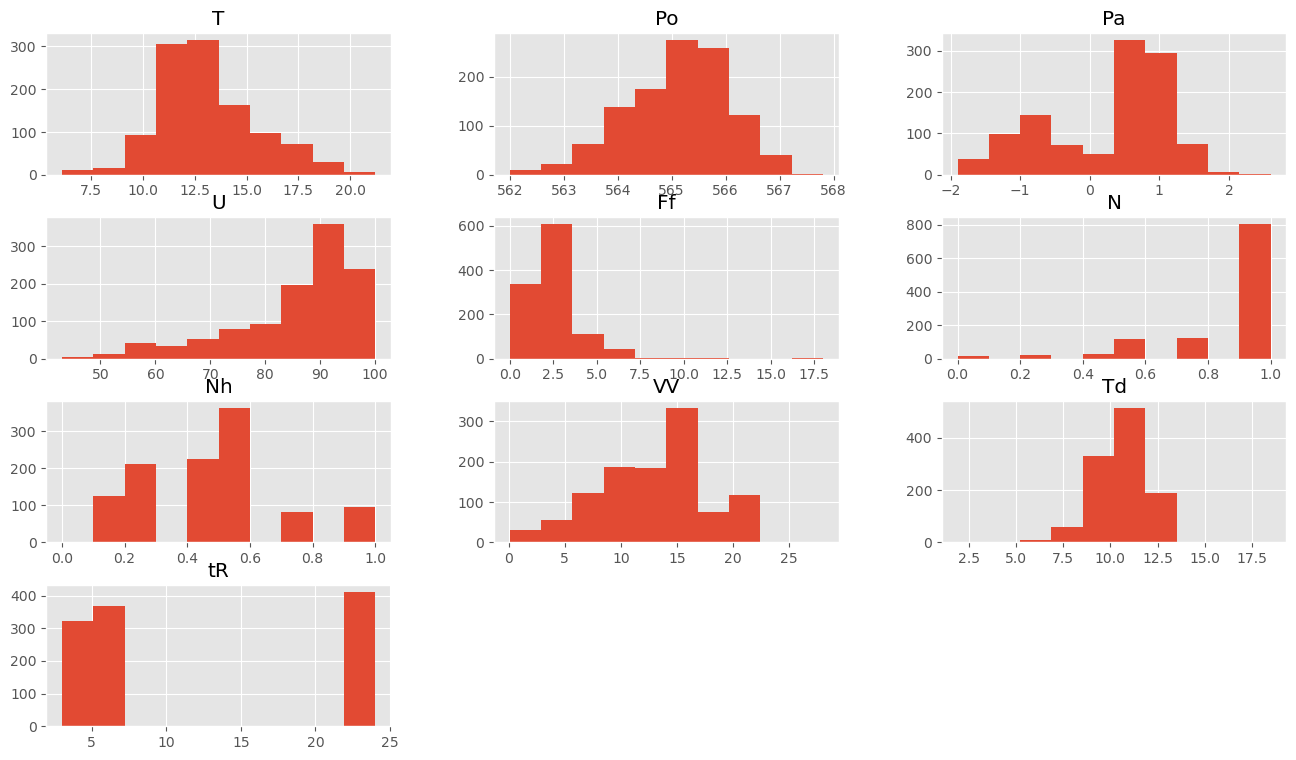

In [8]:
df_data.drop(['RRR'], axis=1).hist()
plt.show()

#### Haremos Feature Selection para mejorar los resultados del algoritmo. Utilizando la clase SelectKBest para seleccionar las 5 mejores caracteristicas. Son las variables que mas aportan al momento de realizar la clasificación.

In [9]:
X = df_data.drop(['RRR'], axis=1)
y = df_data['RRR']

best = SelectKBest(k = 5)
X_new = best.fit_transform(X,y)
X_new.shape
selected = best.get_support(indices = True)
print(X.columns[selected])

Index(['T', 'Pa', 'U', 'Ff', 'tR'], dtype='object')


#### Ahora veremos el grado de correlación que tienen

<AxesSubplot:title={'center':'Correlacion de caracteristicas de Pearson'}>

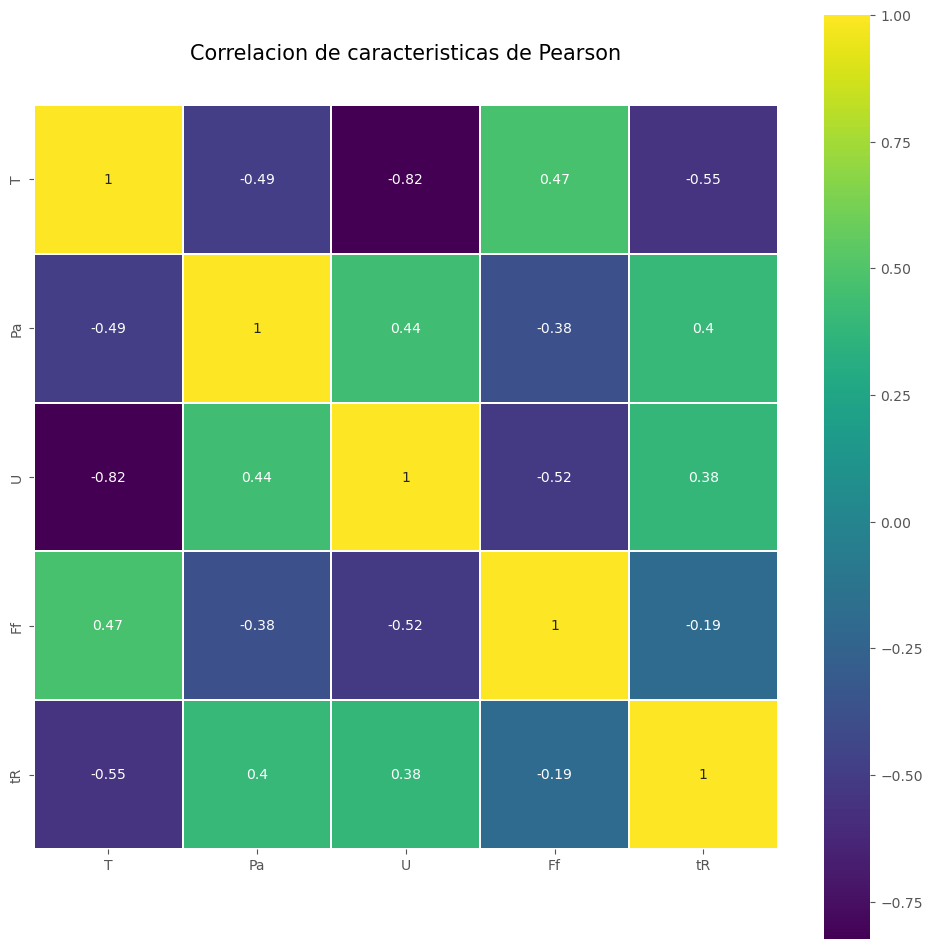

In [10]:
used_features = X.columns[selected]

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlacion de caracteristicas de Pearson', y = 1.05, size = 15)
sns.heatmap(df_data[used_features].astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = 'white', annot = True)

#### División de los datos en conjuntos de prueba y entrenamiento, 80% para entrenamiento y 20% para prueba

In [11]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 6)
X_train, X_test = train_test_split(df_data, test_size = 0.2, random_state = 6)
y_train = X_train['RRR']
y_test = X_test['RRR']

#### Normalizacion de la data

In [13]:
from sklearn.naive_bayes import GaussianNB

bayes_naive = GaussianNB()
bayes_clasif = bayes_naive.fit(X_train[used_features].values, y_train)
y_pred = bayes_naive.predict(X_test[used_features])
#y_pred = bayes_clasif.predict(X_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


#### Se puede ver que el modelo mostro una precision del 69,2%

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print (confusion_matrix(y_test, y_pred))
print (classification_report(y_test, y_pred))
#Indice de ocurrencia
print (accuracy_score(y_test, y_pred))

[[ 36  51]
 [ 17 117]]
              precision    recall  f1-score   support

           0       0.68      0.41      0.51        87
           1       0.70      0.87      0.77       134

    accuracy                           0.69       221
   macro avg       0.69      0.64      0.64       221
weighted avg       0.69      0.69      0.67       221

0.6923076923076923


#### Se crea un dataframe para comparar con los valores reales

In [24]:
comp = pd.DataFrame({'Real': y_test,'Predicho': y_pred})

In [23]:
comp.head(10)

,Real,Predicho
350,0,1
682,0,1
674,1,1
1069,0,0
499,1,1
196,1,1
396,1,0
343,0,0
893,0,0
1003,1,1
